# Notebook to compute tests on the simulations

### Imports

In [2]:
# starting kernel

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx

pd.options.display.max_columns = None
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

def print_df(df):
    display(df)
    return df

from pathlib import Path
FIG_OUT_DIR = Path('Results')

# add package path to sys
import sys
sys.path.insert(0, 'c:\\git\\Causal Data Augmentation\\ADMG') # TO CHANGE to match your current folder

from experiments.suite.data.simulations.acyclic_graph_generator import AcyclicGraphGenerator
from experiments.suite.data.simulations import load_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# I- Simulate from a given graph structure

## I-1- Fork
X2<--X1-->X3

c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


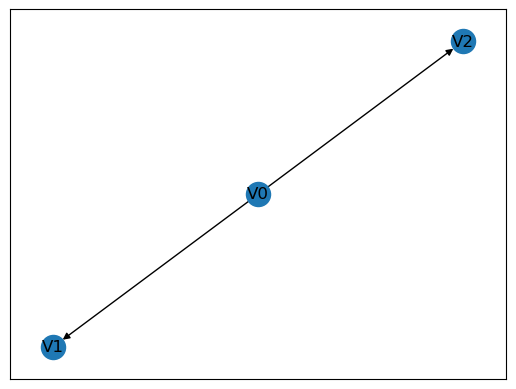

In [3]:
fork_adj = np.zeros((3, 3))
fork_adj[0,1] = 1
fork_adj[0,2] = 1

data = load_data.generate_data(
        causal_mechanism='linear', #['linear', 'polynomial', 'sigmoid_add', 'sigmoid_mix', 'gp_add', 'gp_mix', 'nn']
        adjacency_matrix= fork_adj,
        noise='gaussian', # 'gaussian', 'uniform' or a custom noise function
        noise_coeff=.4,
        npoints=500, 
        nodes=5, 
        parents_max=4, 
        expected_degree=2, # only for erdos graphs
        dag_type='default' # 'default', 'erdos'
    )
graph = load_data.load_graph("graph.gpickle")
nx.draw_networkx(graph)

## I-2- Chain

c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


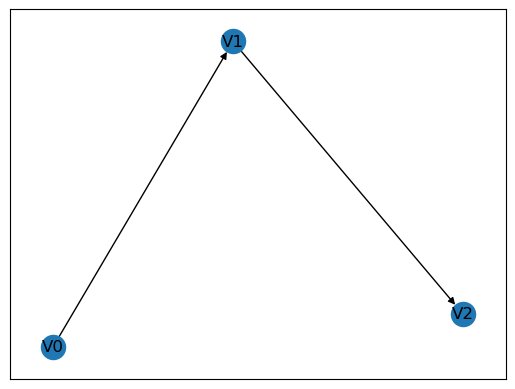

In [4]:
chain_adj = np.zeros((3, 3))
chain_adj[0,1] = 1
chain_adj[1,2] = 1

data = load_data.generate_data(
    causal_mechanism='linear', 
    adjacency_matrix= chain_adj,
    noise='gaussian', 
    noise_coeff=.4,
    npoints=500, 
    )
graph = load_data.load_graph("graph.gpickle")
nx.draw_networkx(graph)

## I-3- Sink

c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


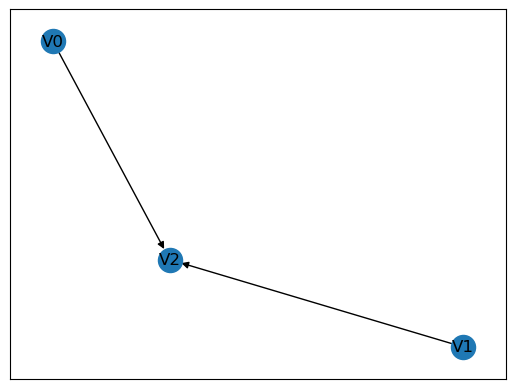

In [5]:
sink_adj = np.zeros((3, 3))
sink_adj[0,2] = 1
sink_adj[1,2] = 1

data = load_data.generate_data(
    causal_mechanism='linear', 
    adjacency_matrix= sink_adj,
    noise='gaussian', 
    noise_coeff=.4,
    npoints=500, 
    )
graph = load_data.load_graph("graph.gpickle")
nx.draw_networkx(graph)

## I-4- Confounded

c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


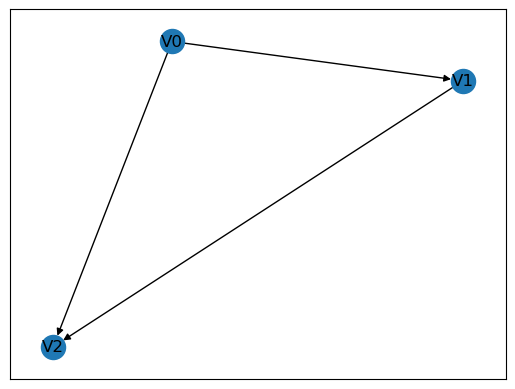

In [6]:
confound_adj = np.zeros((3, 3))
confound_adj[0,1] = 1
confound_adj[0,2] = 1
confound_adj[1,2] = 1

data = load_data.generate_data(
    causal_mechanism='linear', 
    adjacency_matrix= confound_adj,
    noise='gaussian', 
    noise_coeff=.4,
    npoints=500, 
    )
graph = load_data.load_graph("graph.gpickle")
nx.draw_networkx(graph)

# II- Simulate random graphs

c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


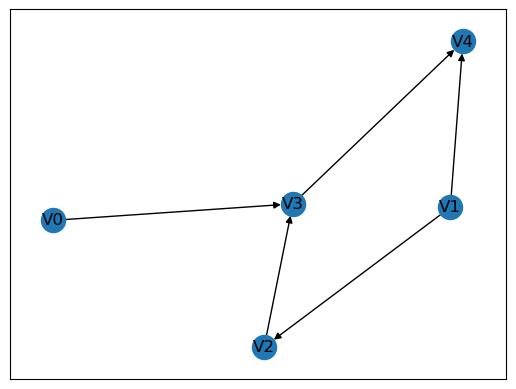

In [7]:
data = load_data.generate_data(
        causal_mechanism='linear', #['linear', 'polynomial', 'sigmoid_add', 'sigmoid_mix', 'gp_add', 'gp_mix', 'nn']
        noise='gaussian', # 'gaussian', 'uniform' or a custom noise function
        noise_coeff=.4,
        #initial_variable_generator=gmm_cause, # should be a function
        npoints=500, 
        nodes=5, 
        parents_max=4, 
        expected_degree=2, # only for erdos graphs
        dag_type='default' # 'default', 'erdos'
)
graph = load_data.load_graph("graph.gpickle")
nx.draw_networkx(graph)

# III- Add perturbations

## III-1- Generate data

c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


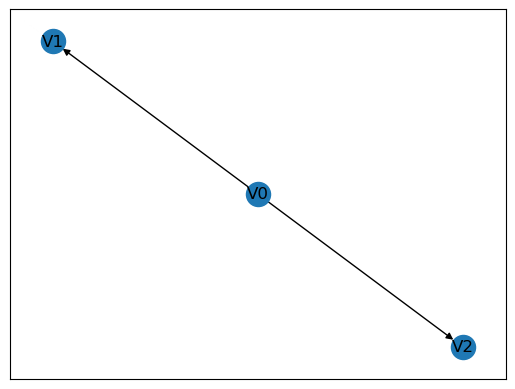

In [8]:
# Generate a graph

fork_adj = np.zeros((3, 3))
fork_adj[0,1] = 1
fork_adj[0,2] = 1

data = load_data.generate_data(
    causal_mechanism='linear', #['linear', 'polynomial', 'sigmoid_add', 'sigmoid_mix', 'gp_add', 'gp_mix', 'nn']
    adjacency_matrix= fork_adj,
    noise='gaussian', # 'gaussian', 'uniform' or a custom noise function
    noise_coeff=.4,
    #initial_variable_generator=gmm_cause, # should be a function
    npoints=500, 
    )
graph = load_data.load_graph()
nx.draw_networkx(graph)

<AxesSubplot:ylabel='Frequency'>

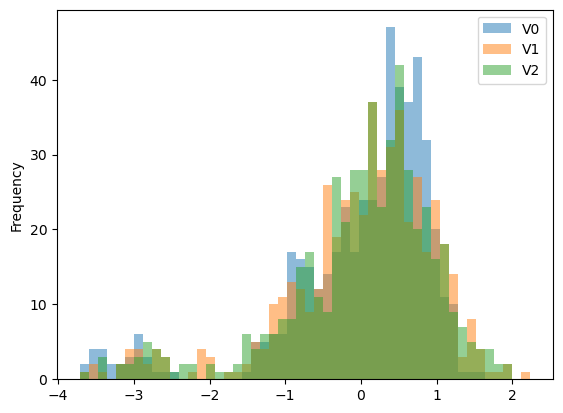

In [9]:
data.plot.hist(bins=50, alpha=0.5)

## III-2- Add observational biases by resampling

c:\git\Causal Data Augmentation\ADMG\experiments\suite\data\simulations\load_data.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased_subdata['weights'] = bias_params['bias_frac']


<AxesSubplot:ylabel='Frequency'>

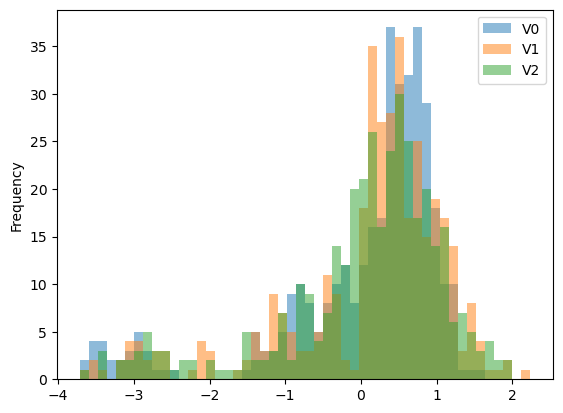

In [10]:
bias_params = {
    'biased_variable': 'V1',
    'bias_frac': 0.1,
    'sampling_effect': 'undersample',
    'intervalle_to_bias_start': -1,
    'intervalle_to_bias_end': 0
}
biased_dataset = load_data.introduce_observational_bias(data, bias_type='uniform', bias_params=bias_params)
biased_dataset.plot.hist(bins=50, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

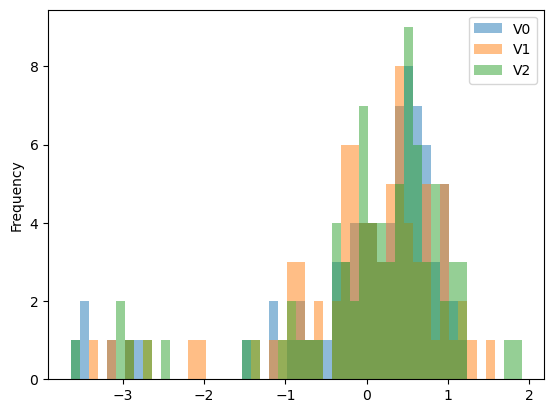

In [11]:
bias_params = {
    'biased_variable': 'V1',
    'bias_frac': 0.1,
    'sampling_effect': 'undersample',
    'std': 1,
    'mean': 0
}
biased_dataset = load_data.introduce_observational_bias(data, bias_type='gaussian', bias_params=bias_params)
biased_dataset.plot.hist(bins=50, alpha=0.5)

## III-3- Add outliers

### III-3-a Uniformly sampled outliers from the support

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


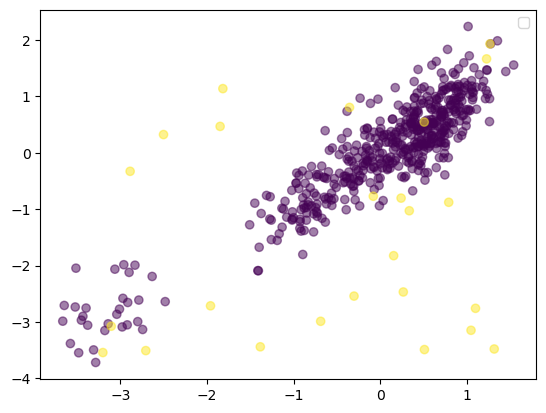

In [12]:
frac_outlier=0.05

dataset_with_outliers, outliers_index_list = load_data.add_uniform_outliers(data, frac_outlier=frac_outlier)
dataset_with_outliers["is_outlier"] = 0
dataset_with_outliers.loc[outliers_index_list, "is_outlier"] = 1

plt.scatter(dataset_with_outliers['V0'], dataset_with_outliers['V1'], c=dataset_with_outliers['is_outlier'], alpha=0.5)
plt.legend()
plt.show()

### III-3-b- Outliers comming from another random causal model

c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\AudreyPOINSOT\anaconda3\envs\ADMGresults\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


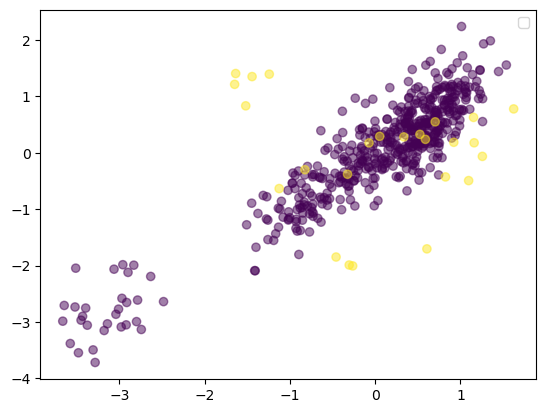

In [13]:
frac_outlier = 0.05

outlier_causal_model_param={
    'causal_mechanism' : 'polynomial',
    'adjacency_matrix' : None,
    'noise' : 'gaussian',
    'noise_coeff' : 0.4,
    'nodes' : 3,
    'parents_max' : 2,
    'expected_degree' : 3,
    'dag_type' : 'default'
}

dataset_with_outliers, outliers_index_list = load_data.add_causal_outliers(data, outlier_causal_model_param=outlier_causal_model_param, frac_outlier=frac_outlier)
dataset_with_outliers["is_outlier"] = 0
dataset_with_outliers.loc[outliers_index_list, "is_outlier"] = 1

plt.scatter(dataset_with_outliers['V0'], dataset_with_outliers['V1'], c=dataset_with_outliers['is_outlier'], alpha=0.5)
plt.legend()
plt.show()